# ***Convolutional Neural Network (CNN) Development for Image Classification on CIFAR-10 Dataset***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Load and Preprocess Dataset
# Load CIFAR-10 dataset (50,000 training images, 10,000 test images)
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
# Normalize pixel values (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# One-hot encode labels (e.g., "3" → [0,0,0,1,0,0,0,0,0,0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [ ]:
# Build CNN Model
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # Second Convolutional Block
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Third Convolutional Block
    layers.Conv2D(64, (3,3), activation='relu'),

    # Flatten + Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,      # random rotations
    width_shift_range=0.1,  # horizontal shifts
    height_shift_range=0.1, # vertical shifts
    horizontal_flip=True    # flip images
)

datagen.fit(x_train)

In [ ]:
# Train Model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=datagen.flow(x_test, y_test, batch_size=64) # Use datagen.flow for validation data as well
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 74ms/step - accuracy: 0.2997 - loss: 1.8844 - val_accuracy: 0.4725 - val_loss: 1.4534
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.4967 - loss: 1.3942 - val_accuracy: 0.5430 - val_loss: 1.2623
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.5538 - loss: 1.2458 - val_accuracy: 0.5329 - val_loss: 1.3018
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.5857 - loss: 1.1654 - val_accuracy: 0.5758 - val_loss: 1.1930
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.6139 - loss: 1.0946 - val_accuracy: 0.6228 - val_loss: 1.0660
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.6306 - loss: 1.0443 - val_accuracy: 0.6324 - val_loss: 1.0350
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.6467 - loss: 1.0046 - val_accuracy: 0.6523 - val_loss: 0.9776
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.6531 - loss: 0.9862 - val_accurac

In [ ]:
# Plot Training History
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Accuracy')

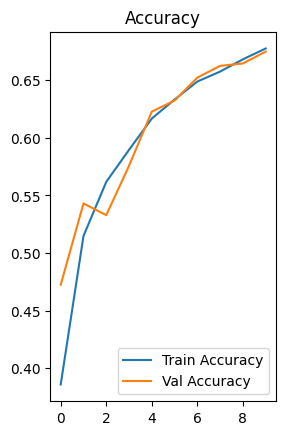

In [ ]:
# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")


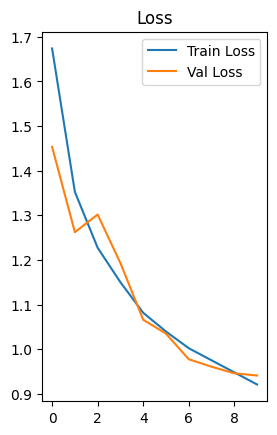

In [ ]:
# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()


In [ ]:
# Feature Map Visualization
# Pick one image from test set
sample_image = x_test[0].reshape(1,32,32,3)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 70ms/step - accuracy: 0.2935 - loss: 1.8914 - val_accuracy: 0.4977 - val_loss: 1.3933
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.4844 - loss: 1.4149 - val_accuracy: 0.5746 - val_loss: 1.1975
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.5483 - loss: 1.2672 - val_accuracy: 0.6053 - val_loss: 1.1202
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.5889 - loss: 1.1548 - val_accuracy: 0.6379 - val_loss: 1.0125
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.6092 - loss: 1.1034 - val_accuracy: 0.6459 - val_loss: 1.0074
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


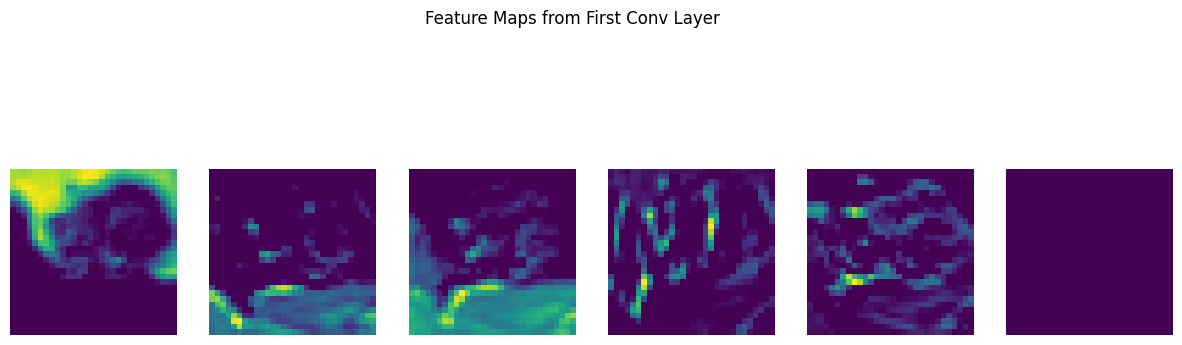

In [ ]:
from tensorflow.keras import Input, Model

# Rebuild CNN Model (Functional API to avoid .input error)
inputs = Input(shape=(32,32,3))

x = layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(64, (3,3), activation='relu')(x)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(64, (3,3), activation='relu')(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile again
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train again
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=5,                                                 # (make it 10+ if you want better accuracy)
    validation_data=(x_test, y_test)
)

# Feature Map Visualization

# Collect outputs of convolutional layers
layer_outputs = [layer.output for layer in model.layers if isinstance(layer, layers.Conv2D)]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Pick one test image
sample_image = x_test[0].reshape(1,32,32,3)

# Get activations
activations = activation_model.predict(sample_image)

# Visualize feature maps from the FIRST conv layer
first_layer_activation = activations[0]

plt.figure(figsize=(15,5))
for i in range(6):  # show 6 feature maps
    plt.subplot(1,6,i+1)
    plt.imshow(first_layer_activation[0,:,:,i], cmap='viridis')
    plt.axis('off')
plt.suptitle("Feature Maps from First Conv Layer")
plt.show()
